생선의 길이, 높이, 두께, 대각선길이, 두께  
## 럭키백의 확률  
1. KNN Classifier 

## 데이터 준비하기  

In [ ]:
import pandas as pd
fish=pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


'Species' : Target  
나머지 col : 5개의 features  

In [ ]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
fish_input=fish.loc[:,'Weight':].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [ ]:
fish_target=fish['Species'].to_numpy()

In [ ]:
# train/test data
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

In [ ]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

## KNN Classifier의 확률 예측  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


### 다중분류 (Multiclass classification)  
타깃데이터에 2개 이상의 클래스가 포함된 분류 문제  
<br/>
  
+ 다중분류에서도 타깃값을 숫자로 바꿀 수 있지만, 사이킷런에서는 문자열로 된 타깃값 그대로 분류류 가능!  

In [ ]:
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

타깃값이 알파벳 순서로 모델에 저장됨 

In [ ]:
# 5개 샘플에 대한 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
# 예측의 확률
import numpy as np

proba=kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4)) #소수 4번째 자리까지 표기 
print(kn.classes_)
print()
print(kn.predict(test_scaled[:5]))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


`predict_proba()` 메소드는 `classes_` 속성과 출력 순서가 같음

In [ ]:
# 4th sample에 대하여 최근접 이웃 확인하기
distances,indexes=kn.kneighbors([test_scaled[3]])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


In [ ]:
kn.kneighbors([test_scaled[3]])

(array([[0.20774583, 0.24862983, 0.33682411]]), array([[104, 115, 106]]))

<br/>  

---  
## 로지스틱 회귀(Logistic Regression)  
: 이름은 회귀이지만, 분류 모델  
+ 선형 방정식을 학습함  
$y=a(Weight)+b(Length)+c(Diagonal)+d(Height)+e(Width)+f$  
    + $a,b,c,d,e$ : 계수 (혹은 가중치)  
    + $z$ : $(-\infty,\infty)$  
        + 확률로 바꿔줘야함 -> 로지스틱 함수(시그모이드 함수) 
        + $\phi(z)=\frac{1}{1+e^{-z}}$  
        

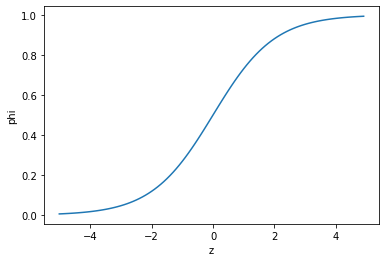

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z=np.arange(-5,5,0.1)
phi=1/(1+np.exp(-z))

plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기  
+ 로지스틱 함수 $\phi(z)$ < 0.5 : 음성
+ $\phi(z)$ > 0.5 : 양성  
    + 참고: $\phi$=0.5 일때 사이킷런은 음성으로 판단  
    

In [ ]:
# 불리언 인덱싱
char_arr=np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [ ]:
# train data에서 도미(Bream), 빙어(Smelt) 행만 골라내기
bream_smelt_index=(train_target=='Bream') | (train_target=='Smelt')
train_bream_smelt=train_scaled[bream_smelt_index] # 훈련 input 데이터
target_bream_smelt=train_target[bream_smelt_index] # 훈련 target 데이터터

In [ ]:
# 로지스틱 회귀 모델 훈련하기
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [ ]:
# 5개 샘플 분류하기 

print(lr.predict(train_bream_smelt[:5]))
print()
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


In [ ]:
target_bream_smelt=='Bream'

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True, False,  True,  True])

In [ ]:
# 참고 : 'Bream'을 음성, 'Smelt'를 양성으로 하고 싶으면? 
    ## 타겟값을 Bream==1, Smelt==0 으로 바꾸기

'''
    bream_index=target_bream_smelt=='Bream'
    target_smelt_bream=np.zeros(len(target_bream_smelt))
    target_smelt_bream[bream_index]=1

    print(target_smelt_bream[:5])
    print(target_bream_smelt[:5])
    print()

    lr.fit(train_bream_smelt,target_smelt_bream)
    print(lr.predict(train_bream_smelt[:5]))
    print(lr.predict_proba(train_bream_smelt[:5]))
    lr.classes_

'''

"\n    bream_index=target_bream_smelt=='Bream'\n    target_smelt_bream=np.zeros(len(target_bream_smelt))\n    target_smelt_bream[bream_index]=1\n\n    print(target_smelt_bream[:5])\n    print(target_bream_smelt[:5])\n    print()\n\n    lr.fit(train_bream_smelt,target_smelt_bream)\n    print(lr.predict(train_bream_smelt[:5]))\n    print(lr.predict_proba(train_bream_smelt[:5]))\n    lr.classes_\n\n"

In [ ]:
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


$z=-4.04 \cdotp Weight-0.575 \cdotp Length -0.663\cdotp Diagonal  -1.013\cdotp Height -0.732 \cdotp Width - 2.152 \\ \phi(z)=\frac{1}{1+e^{-z}}$    


In [ ]:
# z값 계산하기 
decisions=lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
from scipy.special import expit
print(expit(decisions))
print(lr.predict_proba(train_bream_smelt[:5])[:,1])

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중분류 수행하기  
`from sklearn.linear_model import LogisticRegression`  
+ LogisticRegression 클래스는 반복 알고리즘을 사용함  
    + 매개변수 max_iter의 default값=100
    + 반복 횟수가 부족하면 경고가 뜸 
+ LogisticRegression의 규제
    + __릿지회귀__처럼 계수의 제곱을 규제
        + 릿지회귀는 매개변수 alpha : 규제 정도를 정함
    + LogisticRegression은 매개변수 C가 규제의 정도를 정함 
        + __중요!__ : default=1, C가 커지면 규제가 완화됨

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [ ]:
# 5개 샘플 예측
lr.predict(train_scaled[:5])

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki'], dtype=object)

In [ ]:
prob=lr.predict_proba(train_scaled[:5])
print(np.round(prob,3))
print(lr.classes_)

[[0.998 0.001 0.    0.    0.    0.    0.002]
 [0.    0.    0.001 0.999 0.    0.    0.   ]
 [0.    0.002 0.051 0.    0.006 0.941 0.   ]
 [0.    0.001 0.86  0.001 0.135 0.    0.004]
 [0.009 0.783 0.007 0.    0.187 0.    0.014]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[-1.49002087 -1.02912886  2.59345551  7.70357682 -1.2007011 ]
 [ 0.19618235 -2.01068181 -3.77976834  6.50491489 -1.99482722]
 [ 3.56279745  6.34357182 -8.48971143 -5.75757348  3.79307308]
 [-0.10458098  3.60319431  3.93067812 -3.61736674 -1.75069691]
 [-1.40061442 -6.07503434  5.25969314 -0.87220069  1.86043659]
 [-1.38526214  1.49214574  1.39226167 -5.67734118 -4.40097523]
 [ 0.62149861 -2.32406685 -0.90660867  1.71599038  3.6936908 ]]
[-0.09205179 -0.26290885  3.25101327 -0.14742956  2.65498283 -6.78782948
  1.38422358]


In [ ]:
print(lr.coef_.shape,lr.intercept_.shape)

(7, 5) (7,)


계수가 7x5 차원을 갖는다  
+ 일단, 5개의 feature (weight,length, 등등)을 사용했음  
+ 7 row인 이유?  
    + z값을 7개씩 계산한다.
    + 그중 가장 높은 z값의 클래스(생선)이 예측 클래스(생선)이 되는 것이다. 
    + 이진 분류에서는 __로지스틱 함수(시그모이드)__를 통해 z->확률값으로 변환
    + 다중 분류에서는 __소프트맥스(Soft max)__ 함수를 통해 z->확률값으로 변환

#### 소프트맥스 함수  
7개로 분류하는 다중 분류에서 $z_1,z_2,\dots z_7$의 값이 계산됨  
+ 만약 kth 샘플이 $z_3$값이 가장 크다면 kth t샘플은 3번째 클래스로 분류될 것임  
+ $z_1,z_2,\dots z_7$ 값들을 softmax함수를 통해 확률로 변환했을때  
$p_1+p_2+\dots +p_7=1$  
<br/>  

+ __소프트맥스 함수__  
    $E≡\exp(z_1)+\exp(z_2)+\dots+\exp(z_7)$  
    $p_1≡\frac{\exp(z_1)}{E}=\frac{\exp(z_1)}{\exp(z_1)+\dots+\exp(z_7)}$  
    $p_2≡\frac{\exp(z_2)}{E}=\frac{\exp(z_1)}{\exp(z_2)+\dots+\exp(z_7)}$  
    $\dots$

In [ ]:
decision=lr.decision_function(test_scaled[:5]) # z값
print(np.round(decision,2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax
proba=softmax(decision,axis=1) # row에 대해 softmax
print(np.round(proba,3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
